Graphical model to be built:
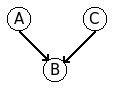

In [1]:
from myPGM.BayesianModel import BayesianModel

bayes = BayesianModel([('A', 'B'),('C', 'B')])#,('B', 'D'),('B','E')])

In [3]:
from myPGM.TabularCPD import TabularCPD

In [4]:
cpd_a = TabularCPD('A', values=[[0],[1]])
cpd_c = TabularCPD('C', values=[[0.8],[0.2]])
cpd_b = TabularCPD('B', values=[[0.2, 0.3, 0.5, 0.6],[0.8,0.7,0.5,0.4]], evidence=['A','C'])

In [7]:
bayes.add_cpds(cpd_a, cpd_c, cpd_b)

In [8]:
bayes.print_graph()

Node B has parents ['A', 'C']
Node C has parents []
Node A has parents []

CPDs: 
Query variables: B
Evidences: A, C
CPD: 
[[ 0.2  0.3  0.5  0.6]
 [ 0.8  0.7  0.5  0.4]]
Query variables: C
Evidences: 
CPD: 
[[ 0.8]
 [ 0.2]]
Query variables: A
Evidences: 
CPD: 
[[0]
 [1]]


In [9]:
product = cpd_b.multiplyCPD(cpd_a, 'A')
print(product)

Query variables: B, A, C
Evidences: 
CPD: 
[[ 0. ]
 [ 0. ]
 [ 0.5]
 [ 0.6]
 [ 0. ]
 [ 0. ]
 [ 0.5]
 [ 0.4]]


In [10]:
print(product.marginalizeCPD('C'))

Query variables: B, A
Evidences: 
CPD: 
[[ 0. ]
 [ 1.1]
 [ 0. ]
 [ 0.9]]


In [11]:
from myPGM.VariableElimination import VariableElimination

In [12]:
inference = VariableElimination(bayes)

In [13]:
inference.query(['A'], {'C': 0})

Query variables: A
Evidences: 
CPD: 
[[0]
 [1]]


In [14]:
inference.query(['B'], {'C': 0})

Query variables: B, C
Evidences: 
CPD: 
[[ 0.5]
 [ 0.6]
 [ 0.5]
 [ 0.4]]


In [29]:
inference.query(['B'], {'A': 0})

Query variables: B, A
Evidences: 
CPD: 
[[ 0.22]
 [ 0.52]
 [ 0.78]
 [ 0.48]]


### Compare my implementation to pgmpy

In [15]:
from pgmpy.factors.discrete import TabularCPD as TCPD
from pgmpy.inference import VariableElimination as VE
from pgmpy.models import BayesianModel as BM

In [16]:
bayes_pgm = BM([('A', 'B'),('C', 'B')])

In [20]:
cpd_a_pgm = TCPD('A', 2, values=[[0],[1]])
cpd_c_pgm = TCPD('C', 2, values=[[0.8],[0.2]])
cpd_b_pgm = TCPD('B', 2, values=[[0.2, 0.3, 0.5, 0.6],[0.8,0.7,0.5,0.4]], evidence=['A','C'], evidence_card=[2, 2])

In [21]:
bayes_pgm.add_cpds(cpd_a_pgm, cpd_c_pgm, cpd_b_pgm)

In [22]:
inference_pgm = VE(bayes_pgm)

In [26]:
q=inference_pgm.query(['A'], {'C': 0})
print(q['A'])

╒═════╤══════════╕
│ A   │   phi(A) │
╞═════╪══════════╡
│ A_0 │   0.0000 │
├─────┼──────────┤
│ A_1 │   1.0000 │
╘═════╧══════════╛


In [27]:
q2=inference_pgm.query(['B'], {'C': 0})
print(q2['B'])

╒═════╤══════════╕
│ B   │   phi(B) │
╞═════╪══════════╡
│ B_0 │   0.5000 │
├─────┼──────────┤
│ B_1 │   0.5000 │
╘═════╧══════════╛


In [28]:
q3=inference_pgm.query(['B'], {'A': 0})
print(q3['B'])

╒═════╤══════════╕
│ B   │   phi(B) │
╞═════╪══════════╡
│ B_0 │   0.2200 │
├─────┼──────────┤
│ B_1 │   0.7800 │
╘═════╧══════════╛
